In [1]:
# Carrega JSON

import json

users = {}

with open('spotify-plugin-app-export.json') as json_file:
    data = json.load(json_file)

    for userKey in data['events'].keys():
        user = data['events'][userKey]
        userEvents = []

        for key in user.keys():
            userEvents.append(user[key])

        users[userKey] = userEvents


for userKey in users.keys():
    print(f"len({userKey}) => {len(users[userKey])}")

len(spotify:user:16nxkn6lmlix2ou2w2rvodu3n) =&gt; 9
len(spotify:user:226rxsqefx3heakyeln7t3unq) =&gt; 27
len(spotify:user:22iwjt6kc4zv74sq7cutkhtwy) =&gt; 9
len(spotify:user:3152wu7mz2aoxfrg5mtqov77lseu) =&gt; 19
len(spotify:user:31bfdxg5fe2335adqfcg4xpugpcq) =&gt; 10
len(spotify:user:3ka2awymoso1wgdlwuq50uz8h) =&gt; 16
len(spotify:user:4i3jdhv6vubcjdpwsn38iv8u4) =&gt; 376
len(spotify:user:8q3uk0rwypu5r7dsq48476qak) =&gt; 5
len(spotify:user:andressltz) =&gt; 162
len(spotify:user:b8r2mhyhep5t0np1keaqmvvi0) =&gt; 20
len(spotify:user:gabrielcartelli) =&gt; 3
len(spotify:user:ggkonzen) =&gt; 12
len(spotify:user:iisa1999) =&gt; 326
len(spotify:user:iortim) =&gt; 174
len(spotify:user:jyangalonga) =&gt; 229
len(spotify:user:maiconunzer) =&gt; 7
len(spotify:user:o16tnkq56zdt2obwii1vgbs4o) =&gt; 5
len(spotify:user:tiagoterme) =&gt; 65


In [2]:
# Separa Contexto

import pandas as pd

usersContexts = {}

contexts = []
currentCtx = None

for event in users['spotify:user:4i3jdhv6vubcjdpwsn38iv8u4']:
    if event['action'] == "CHOOSE_FEELING":
        if currentCtx:
            contexts.append(currentCtx)

        currentCtx = {"musics": [], "info": {"feeling": event['value']}}
    elif event['action'] == "CHOOSE_ACTIVITY":
        currentCtx['info']['activity'] = event['value']
    elif event['action'] == "CHOOSE_LOCATION":
        currentCtx['info']['location'] = event['value']
    elif event['action'] == "LOAD_LOCATION":
        # currentCtx['info']['loaded_location'] = event['value']
        a = 0
    else:
        currentCtx['musics'].append(event)

contexts.append(currentCtx)

df=pd.DataFrame(contexts)

df.head()

,musics,info
0,"[{'action': 'PLAY_MUSIC', 'createdDateTime': '...","{'feeling': 'feliz', 'activity': 'estudando', ..."
1,[],"{'feeling': 'feliz', 'activity': 'estudando', ..."
2,[],"{'feeling': 'alegre', 'activity': 'estudando',..."
3,[],"{'feeling': 'feliz', 'activity': 'estudando', ..."
4,[],"{'feeling': 'alegre;animada', 'activity': 'est..."


In [3]:
# Separa contexto das musicas

musicTable = []
currentMusicCtx = None
lastMusic = None

for ctx in contexts:
    for music in ctx['musics']:
        if music['value'] != lastMusic:
            if lastMusic:
                currentMusicCtx.update(ctx['info'])
                musicTable.append(currentMusicCtx)
            
            lastMusic = music['value']
            currentMusicCtx = {'uri': music['value'], 'like': 0, 'hate':0, 'restart':0}

        if music['action'] == 'LIKED_MUSIC':
            currentMusicCtx['like'] += 1
        elif music['action'] == 'HATED_MUSIC':
            currentMusicCtx['hate'] += 1
        elif music['action'] == 'RESTART_MUSIC':
            currentMusicCtx['restart'] += 1

    currentMusicCtx.update(ctx['info'])
    musicTable.append(currentMusicCtx)


dfm=pd.DataFrame(musicTable)

dfm.head()

,uri,like,hate,restart,feeling,activity,location
0,spotify:track:29aSfWddeZJCfnrcMb20sy,1,0,0,feliz,estudando,casa
1,spotify:track:2evFJQfQVcDEXyOiyEV6OW,0,0,0,feliz,estudando,casa
2,spotify:track:6Te1vrlCz4DdCeONagkT6j,0,0,1,feliz,estudando,casa
3,spotify:track:5YrMcUZoNXlUCfwgnfocgL,0,0,0,feliz,estudando,casa
4,spotify:track:120w1eBYfiYrSXtegu6uEb,1,0,0,feliz,estudando,casa


In [4]:
# busca informações das musicas

import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv # add this line

load_dotenv() # add this line

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=os.getenv('SPOTIFY_CLIENT_ID'),
                                                           client_secret=os.getenv('SPOTIFY_CLIENT_SECRET')))

musicsIds = list(map(lambda x : x['uri'], musicTable))

tracks = []
tracksMap = {}

i = 0

while i < len(musicsIds):
    ids = musicsIds[i:i + 50]
    response = sp.tracks(ids)
    tracks.extend(response['tracks'])
    i += 50

for track in tracks:
    tracksMap[track['uri']] = track

dft=pd.DataFrame(tracksMap)

dft

,spotify:track:29aSfWddeZJCfnrcMb20sy,spotify:track:2evFJQfQVcDEXyOiyEV6OW,spotify:track:6Te1vrlCz4DdCeONagkT6j,spotify:track:5YrMcUZoNXlUCfwgnfocgL,spotify:track:120w1eBYfiYrSXtegu6uEb,spotify:track:03nPEoQOYMuDe7KmGljpmd,spotify:track:6PYnUsNEpYC7A4BS2sjw3L,spotify:track:50UkypyQJbSQLaXHke5Yep,spotify:track:4E5P1XyAFtrjpiIxkydly4,spotify:track:1lOe9qE0vR9zwWQAOk6CoO,...,spotify:track:4LkYErZ63mSuUNFKuwblN2,spotify:track:6XKlF0022zVma4DZsWHFkb,spotify:track:1k9fcGWwrnyuij2Lvd3OHs,spotify:track:7sziTn5nHwrWf4K7gISaaU,spotify:track:7keXdrB4mz57u4b8YkCwag,spotify:track:4w1lzcaoZ1IC2K5TwjalRP,spotify:track:70oZtMOR5FDMlcV4w0dfhi,spotify:track:0KKkJNfGyhkQ5aFogxQAPU,spotify:track:2BJy5YrRMhVCqaLNY5cbv2,spotify:track:21jGcNKet2qwijlDFuPiPb
album,"{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'single', 'artists': [{'externa...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...",...,"{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external..."
artists,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...
available_markets,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AR, AU, BO, BR, CL, CO, CR, DE, DO, EC, GT, H...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AD, AE, AR, AT, AU, BA, BE, BG, BH, BO, BR, B...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AD, AR, AT, AU, BA, BE, BG, BO, BR, CA, CH, C...","[AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR, B...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",...,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AD, AE, AR, AT, AU, BE, BG, BO, BR, CA, CH, C...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AE, AR, AT, AU, BA, BE, BG, BH, BO, BR, BY, C...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."
disc_number,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
duration_ms,227226,272066,278693,226226,251480,260000,254999,180493,182306,

In [5]:
# busca informações dos artistas (genero)

artistsIds = list(map(lambda x : x['artists'][0]['id'], tracks))

artists = []
artistsMap = {}

i = 0
while i < len(artistsIds):
    ids = artistsIds[i:i + 50]
    response = sp.artists(ids)
    artists.extend(response['artists'])
    i += 50

for artist in artists:
    artistsMap[artist['uri']] = artist

dfa=pd.DataFrame(artistsMap)

dfa

,spotify:artist:2IvkS5MXK0vPGnwyJsrEyV,spotify:artist:3THMgU4KdL7LlO5TEREs2g,spotify:artist:6yJCxee7QumYr820xdIsjo,spotify:artist:37W8SKV5Vc8lcGtdyWCA5m,spotify:artist:0QHgL1lAIqAw0HtD7YldmP,spotify:artist:6LuN9FCkKOj5PcnpouEgny,spotify:artist:6Uh8uJyN9g7oFjDK16nJgb,spotify:artist:5tKXB9uuebKE34yowVaU3C,spotify:artist:4Ga1P7PMIsmqEZqhYZQgDo,spotify:artist:2NdeV5rLm47xAvogXrYhJX,...,spotify:artist:3GBPw9NK25X1Wt2OUvOwY3,spotify:artist:1uNFoZAHBGtllmzznpCI3s,spotify:artist:2l35CQqtYRh3d8ZIiBep4v,spotify:artist:2IAZ2xX1Ovh5jxhBWE7wda,spotify:artist:0FC1LIeQXKib0jOwZqeIwT,spotify:artist:5lbM4g6bhxjNX7R5QHP2nD,spotify:artist:2p4FqHnazRucYQHyDCdBrJ,spotify:artist:5ILrArfIV0tMURcHJN8Q07,spotify:artist:5Hc9oDGvStNGmnj44m8sHg,spotify:artist:246dkjvS1zLTtiykXe5h60
external_urls,{'spotify': 'https://open.spotify.com/artist/2...,{'spotify': 'https://open.spotify.com/artist/3...,{'spotify': 'https://open.spotify.com/artist/6...,{'spotify': 'https://open.spotify.com/artist/3...,{'spotify': 'https://open.spotify.com/artist/0...,{'spotify': 'https://open.spotify.com/artist/6...,{'spotify': 'https://open.spotify.com/artist/6...,{'spotify': 'https://open.spotify.com/artist/5...,{'spotify': 'https://open.spotify.com/artist/4...,{'spotify': 'https://open.spotify.com/artist/2...,...,{'spotify': 'https://open.spotify.com/artist/3...,{'spotify': 'https://open.spotify.com/artist/1...,{'spotify': 'https://open.spotify.com/artist/2...,{'spotify': 'https://open.spotify.com/artist/2...,{'spotify': 'https://open.spotify.com/artist/0...,{'spotify': 'https://open.spotify.com/artist/5...,{'spotify': 'https://open.spotify.com/artist/2...,{'spotify': 'https://open.spotify.com/artist/5...,{'spotify': 'https://open.spotify.com/artist/5...,{'spotify': 'https://open.spotify.com/artist/2...
followers,"{'href': None, 'total': 2712611}","{'href': None, 'total': 430688}","{'href': None, 'total': 2340806}","{'href': None, 'total': 733341}","{'href': None, 'total': 5161097}","{'href': None, 'total': 12628382}","{'href': None, 'total': 495819}","{'href': None, 'total': 593150}","{'href': None, 'total': 2909785}","{'href': None, 'total': 4558764}",...,"{'href': None, 'total': 2947723}","{'href': None, 'total': 38337255}","{'href': None, 'total': 828709}","{'href': None, 'total': 306678}","{'href': None, 'total': 159532}","{'href': None, 'total': 470344}","{'href': None, 'total': 2629197}","{'href': None, 'total': 425194}","{'href': None, 'total': 296480}","{'href': None, 'total': 28582207}"
genres,"[contemporary country, country, country road, ...","[country, country road, country rock, oklahoma...","[contemporary country, country, country road, ...","[contemporary country, country, country road, ...","[dance pop, hip hop, miami hip hop, pop, pop r...","[alternative r&b, pop]","[gangster rap, harlem hip hop, hip hop, nyc ra...","[dance pop, pop rap, post-teen pop]","[melodic rap, rap, trap]","[dance pop, hip pop, pop, pop rap, post-teen p...",...,[neo mellow],"[canadian pop, dance pop, pop, post-teen pop]","[dance pop, pop, pop rap, pop rock, post-teen ...",[neo mellow],"[acoustic pop, indie folk, neo mellow, pop roc...","[australian indie folk, australian reggae fusi...","[canadian pop punk, canadian punk, canadian ro...","[dance pop, lilith, neo mellow, piano rock, po...","[channel pop, indie cafe pop, neo mellow, post...","[dfw rap, melodic rap, rap]"
href,https://api.spotify.com/v1/artists/2IvkS5MXK0v...,https://api.spotify.com/v1/artists/3THMgU4KdL7...,https://api.spotify.com/v1/artists/6yJCxee7Qum...,https://api.spotify.com/v1/artists/37W8SKV5Vc8...,https://api.spotify.com/v1/artists/0QHgL1lAIqA...,https://api.spotify.com/v1/artists/6LuN9FCkKOj...,https://api.spotify.com/v1/artists/6Uh8uJyN9g7...,https://api.spotify.com/v1/artists/5tKXB9uuebK...,https://api.spotify.com/v1/artists/4Ga1P7PMIsm...,https://api.spotify.com/v1/artists/2NdeV5rLm47...,...,https://api.spotify.com/v1/artists/3GBPw9NK25X...,https://api.spotify.com/v1/artists/1uNFoZAHBGt...,https://api.spotify.

In [6]:
# adiciona genero a tabela

for music in musicTable:
    artistId = tracksMap[music['uri']]['artists'][0]['uri']

    music['genre'] = artistsMap[artistId]['genres']

dfmg=pd.DataFrame(musicTable)

dfmg.head()

,uri,like,hate,restart,feeling,activity,location,genre
0,spotify:track:29aSfWddeZJCfnrcMb20sy,1,0,0,feliz,estudando,casa,"[contemporary country, country, country road, ..."
1,spotify:track:2evFJQfQVcDEXyOiyEV6OW,0,0,0,feliz,estudando,casa,"[country, country road, country rock, oklahoma..."
2,spotify:track:6Te1vrlCz4DdCeONagkT6j,0,0,1,feliz,estudando,casa,"[contemporary country, country, country road, ..."
3,spotify:track:5YrMcUZoNXlUCfwgnfocgL,0,0,0,feliz,estudando,casa,"[contemporary country, country, country road, ..."
4,spotify:track:120w1eBYfiYrSXtegu6uEb,1,0,0,feliz,estudando,casa,"[contemporary country, country, country road, ..."


In [7]:
# trocar musica por genero

genreTable = []

for music in musicTable:
    for genre in music['genre']:
        newGenre = music.copy()

        del newGenre['uri']
        del newGenre['genre']

        newGenre['genre'] = genre

        genreTable.append(newGenre)

dfg=pd.DataFrame(genreTable)

dfg.head()

,like,hate,restart,feeling,activity,location,genre
0,1,0,0,feliz,estudando,casa,contemporary country
1,1,0,0,feliz,estudando,casa,country
2,1,0,0,feliz,estudando,casa,country road
3,1,0,0,feliz,estudando,casa,modern country rock
4,0,0,0,feliz,estudando,casa,country


In [8]:
# transformar labels

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

dfg['feeling'] = le.fit_transform(dfg['feeling'])
dfg['activity'] = le.fit_transform(dfg['activity'])
dfg['location'] = le.fit_transform(dfg['location'])

dfg.head()

,like,hate,restart,feeling,activity,location,genre
0,1,0,0,8,2,1,contemporary country
1,1,0,0,8,2,1,country
2,1,0,0,8,2,1,country road
3,1,0,0,8,2,1,modern country rock
4,0,0,0,8,2,1,country


&lt;seaborn.axisgrid.PairGrid at 0x1a922784430&gt;

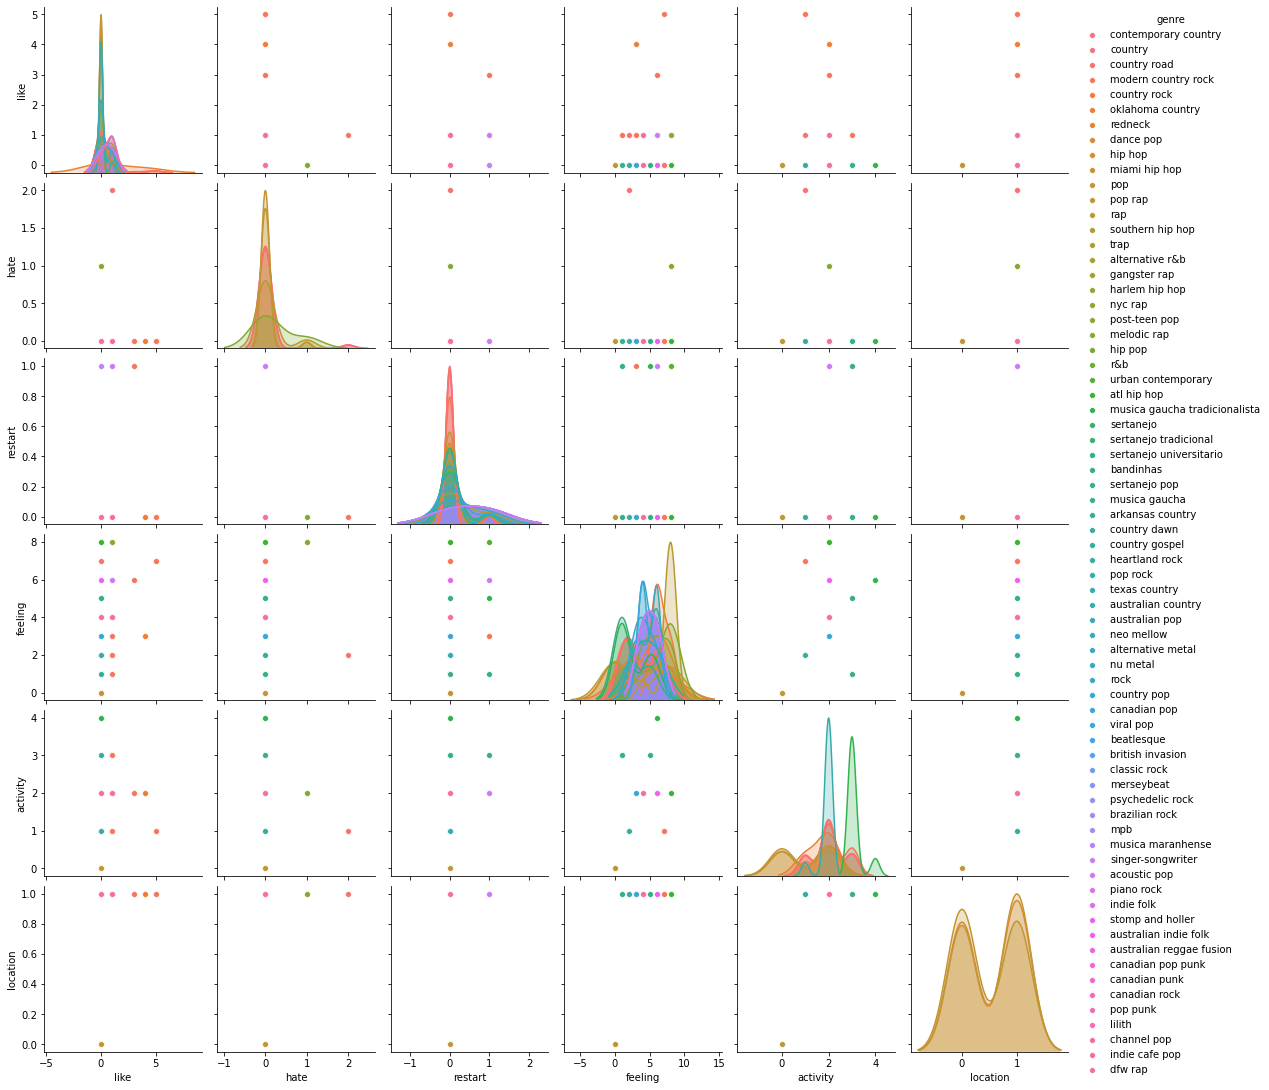

In [9]:
# plotar
import seaborn as sns

sns.pairplot(dfg, hue="genre")

In [10]:
# knn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

model = KNeighborsClassifier(n_neighbors=3)

dfgCopy = dfg.copy()

del dfgCopy['genre']

labels = le.fit_transform(dfg['genre'])

X = dfgCopy[dfgCopy.columns[:]]
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

model.fit(X_train, y_train)

print(X_test)

result = model.predict(X_test)

print(result)

# print(dfg['genre'][result-1])

     like  hate  restart  feeling  activity  location
399     0     0        0        6         2         1
394     0     0        0        6         2         1
453     0     0        0        4         2         1
285     0     0        0        6         2         1
143     0     0        0        1         3         1
..    ...   ...      ...      ...       ...       ...
194     0     0        0        1         3         1
388     0     0        0        2         1         1
393     0     0        0        6         2         1
494     0     0        0        4         2         1
382     0     0        0        2         1         1

[100 rows x 6 columns]
[19 19 27 19 24  4 24 26 20 24 24 19 27 19 42  2 19 19 19 24 19 19 19 27
 19 24  4 24 19 26  4 26 24 24 19 19 19 19 32 44 20  4  0 32 26  4 19 19
 24 26 27 20  4 24 24 24 19  2 19 19 26 27  4 19 24 24 32 19  9 44 26 26
 24 24 20 27 19 19 19 32 27  4 19 19 24 19 19  4  2 33 26  4 20 27 24 24
 19 19 27 19]


In [11]:
model.score(X_test, y_test)

0.13